Loading libraries

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing  import MinMaxScaler
import tensorflow as tf

Data Exploration

In [22]:
#Basic analysis of the dataset
df = pd.read_csv("/content/Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3221,3222,15619465,Cameron,555,Spain,Female,24,2,0.00,2,0,1,197866.55,0
2794,2795,15597930,Wilson,646,France,Male,52,8,59669.43,1,0,0,172495.81,1
8438,8439,15692142,Rogova,707,Germany,Female,48,7,105086.74,1,1,1,180344.69,1
2213,2214,15803749,DeRose,498,Germany,Female,41,4,87541.06,2,1,1,12577.21,1
4234,4235,15567335,Allsop,559,France,Female,42,7,0.00,2,1,1,190040.29,0


Data Cleaning

In [23]:
#Dropping irrelevant rows
df.drop(['CustomerId','RowNumber', 'Surname'], axis='columns', inplace=True)
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


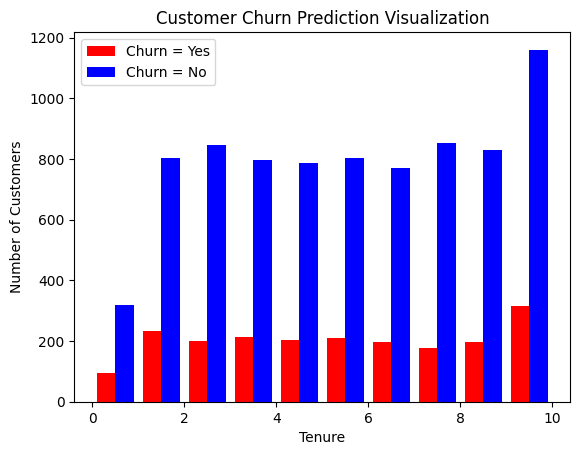

In [24]:
#We want to visualize the tenure from customers that have left and ones that have stayed to further understand the company's cutomer base
tenure_churn_no = df[df.Exited == 0].Tenure
tenure_churn_yes = df[df.Exited == 1].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes, tenure_churn_no], color =['red', 'blue'], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

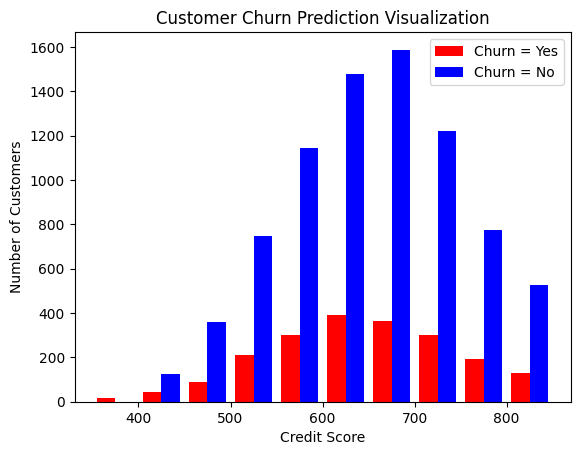

In [25]:
#Data shows very steady churn rates based on tenure. Let's look at credit score to see if there is a greater impcact on Churn
creditscore_churn_no = df[df.Exited == 0].CreditScore
creditscore_churn_yes = df[df.Exited == 1].CreditScore

plt.xlabel("Credit Score")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([creditscore_churn_yes, creditscore_churn_no], color =['red', 'blue'], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

Feature Engineering


In [26]:
#Creating a function to evaluate categorical values
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [27]:
#Converting gender to binary values
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

#One-hot coding for Geography values
df = pd.get_dummies(data=df, dtype=int, columns=['Geography'])

<ipython-input-27-ff654dc4745b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Female':1,'Male':0},inplace=True)
<ipython-input-27-ff654dc4745b>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace({'Female':1,'Male':0},inplace=True)


In [28]:
#We are now scaling columns with values above 1, to values between 0 and 1
cols_to_scale = ['CreditScore', 'Age','Tenure','NumOfProducts','EstimatedSalary']

scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale ])

Data Splitting


In [29]:
#Splitting focus variable
X = df.drop('Exited', axis ='columns')
y = df['Exited']

In [30]:
#Splitting data into training and testing data with a 80/20 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=75)

Model Selection and Building

In [31]:
#Using keras to build a sequential model (12 nuerons first layer and 6 nuerons seccond layer). Model is then compiled and fitted 50 times
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7039 - loss: 40.4960
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7025 - loss: 25.4186
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7160 - loss: 22.7358
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7097 - loss: 19.6811
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7023 - loss: 23.8402
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7074 - loss: 23.1872
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6957 - loss: 19.9437
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7203 - loss: 14.5903
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7045 - loss: 23.7056
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7123 - loss: 20.8918
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7066 - loss: 12.1995
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Model Evaluation

In [32]:
#Model is evaluated
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8408 - loss: 20.1525  


[22.988143920898438, 0.8195000290870667]

In [33]:
#We want to turn all of the predicted values into binary values based on if the value is above or below 0.5
yp = model.predict(X_test)

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Conclusion: We are able to see that the model predicts customer churn with an accuraccy of 82% with precision scores of 0.82 for 0 (No Churn) and 0.67 for 1 (Churn).

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1621
           1       0.67      0.09      0.17       379

    accuracy                           0.82      2000
   macro avg       0.75      0.54      0.53      2000
weighted avg       0.79      0.82      0.76      2000



Text(95.72222222222221, 0.5, 'Truth')

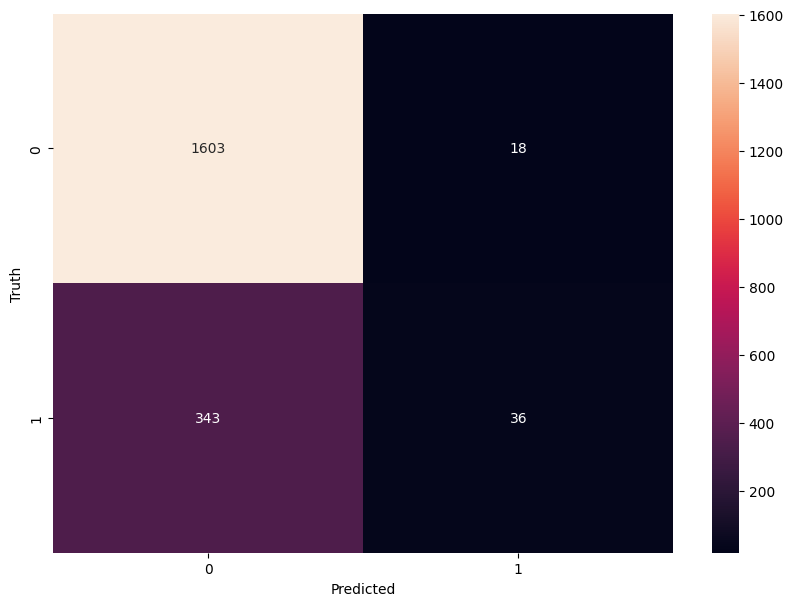

In [34]:
#Building the confusion matrix to identify how many correct predictions were made
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')